In [116]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [120]:
df.shape

(7752, 25)

In [121]:
# check for null values

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Most of the columns has null values

In [122]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

I need to convert object values to numerical values and treat the null values

In [123]:
# converting object values into numbers for model to use
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Date'] = label_encoder.fit_transform(df['Date'])
print(df)

      station  Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0   290          28.7          21.4    58.255688    91.116364   
1         2.0   290          31.9          21.6    52.263397    90.604721   
2         3.0   290          31.6          23.3    48.690479    83.973587   
3         4.0   290          32.0          23.4    58.239788    96.483688   
4         5.0   290          31.4          21.9    56.174095    90.155128   
...       ...   ...           ...           ...          ...          ...   
7747     23.0   304          23.3          17.1    26.741310    78.869858   
7748     24.0   304          23.3          17.7    24.040634    77.294975   
7749     25.0   304          23.2          17.4    22.933014    77.243744   
7750      NaN   310          20.0          11.3    19.794666    58.936283   
7751      NaN   310          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0  

In [124]:
df.drop_duplicates(inplace=True)

df.shape

(7752, 25)

There is no duplicate value

In [125]:
df['Date'].dropna

<bound method Series.dropna of 0       290
1       290
2       290
3       290
4       290
       ... 
7747    304
7748    304
7749    304
7750    310
7751    310
Name: Date, Length: 7752, dtype: int64>

In [126]:
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [127]:
# Remove all null values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
    
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [128]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,154.540119,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,89.517900,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,155.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,310.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Date is showing 0 for minimum value, which is not normal

Difference between the standard deviation and Mean for most the columns is too much, indicating outliers

Difference between Q3 and Max for some columns is too much, also indicating outliers


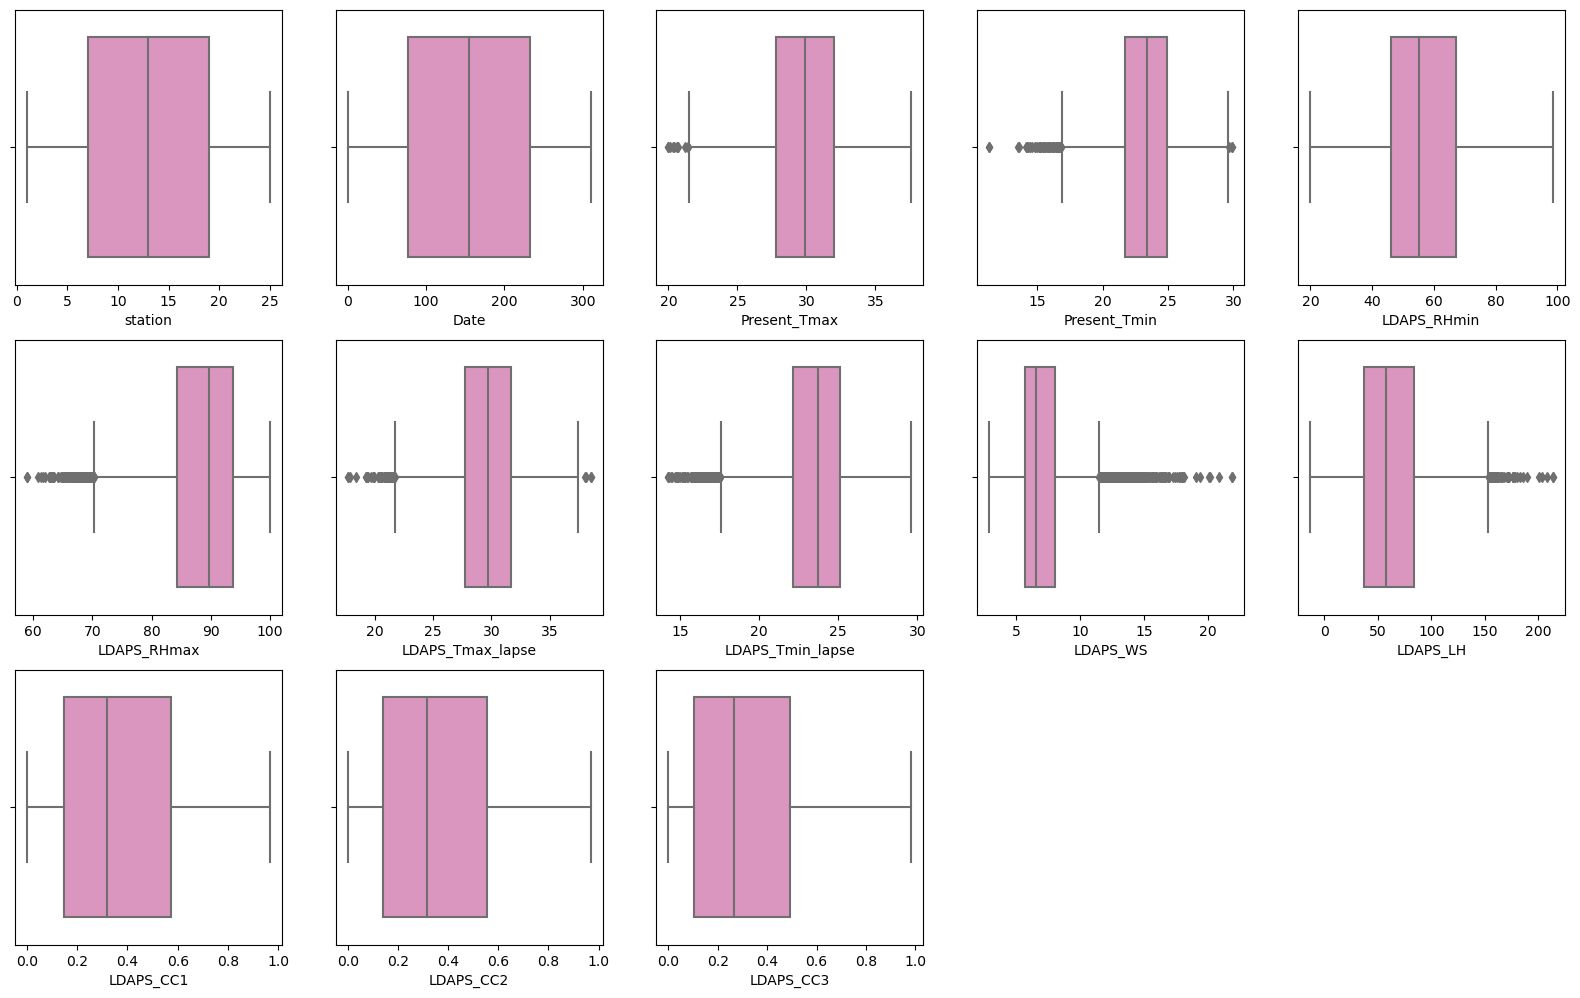

In [129]:
# Lets check the outliers by plotting Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df:
    if p<=13:
        plt.subplot(6,5,p)
        snb.boxplot(df[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

In [130]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH']]
z=np.abs(zscore(out_features))

z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH
0,0.361326,0.759529,0.383078,0.524889,0.216663,0.128382,0.206966
1,0.721084,0.676296,0.311586,0.080895,0.223848,0.646994,0.314841
2,0.619608,0.031188,0.614982,0.162936,0.451210,0.441604,1.249283
3,0.754909,0.072805,1.133054,0.031092,0.079874,0.666247,0.095997
4,0.551957,0.551446,0.248765,0.170325,0.011187,0.627154,1.354409
...,...,...,...,...,...,...,...
7747,2.187892,2.549048,1.328126,1.112066,2.029679,0.436683,0.284622
7748,2.187892,2.299348,1.548184,0.887662,2.047744,0.255421,0.454749
7749,2.221718,2.424198,1.555342,0.570780,2.137962,0.088072,1.591397
7750,3.304127,4.962817,4.113443,4.087857,3.959146,1.939757,2.267499


In [131]:
# Using Threshold of 3 to check for outliers

np.where(z>3)

(array([  25,   33,   44,  175,  194,  269,  294,  344,  375,  394,  419,
         494,  519,  544,  569,  575,  584,  594,  969, 1324, 1424, 1494,
        1652, 1661, 1663, 1664, 1670, 1674, 1778, 1779, 1781, 1791, 1794,
        2175, 2176, 2177, 2178, 2179, 2179, 2180, 2181, 2181, 2182, 2183,
        2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194,
        2195, 2196, 2197, 2198, 2199, 2353, 2354, 2356, 2369, 2375, 2378,
        2394, 2441, 2528, 2544, 2569, 2675, 2775, 3104, 3116, 3191, 3202,
        3209, 3211, 3215, 3216, 3220, 3224, 3261, 3263, 3264, 3266, 3268,
        3272, 3273, 3286, 3288, 3289, 3298, 3375, 3378, 3394, 3400, 3404,
        3406, 3407, 3408, 3409, 3411, 3413, 3419, 3441, 3454, 3466, 3475,
        3477, 3478, 3479, 3480, 3481, 3482, 3482, 3483, 3484, 3485, 3486,
        3486, 3487, 3488, 3488, 3489, 3491, 3493, 3494, 3495, 3497, 3498,
        3499, 3525, 3719, 3944, 3950, 3969, 4475, 4476, 4478, 4484, 4494,
        4552, 4564, 4591, 4744, 4750, 

In [132]:
df2 = df[(z<3).all(axis=1)]

df2

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,304,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [134]:
print('the shape of new data: ',df.shape[0])
print('the shape of old data: ',df2.shape[0])

print('percentage data loss after removing outliers ', ((df.shape[0] - df2.shape[0])/df.shape[0])* 100)

the shape of new data:  7752
the shape of old data:  7483
percentage data loss after removing outliers  3.470072239422085


The data loss is not much

The features are much and want to select best performing features to improve the speed of the model.

# Select best performing features for models that can predict the maximum temperature 

In [78]:

from sklearn.feature_selection import SelectKBest, f_classif

# Seperate the label from the features
xmax = df2.drop('Next_Tmax', axis=1)

ymax = df2['Next_Tmax']

In [79]:
# Checking best performing features
best_features = SelectKBest(score_func=f_classif,k=9)
fit = best_features.fit(xmax,ymax)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(xmax.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(30,'score'))

        feature_name      score
6   LDAPS_Tmax_lapse  87.967636
2       Present_Tmax  27.429311
23         Next_Tmin  26.342973
7   LDAPS_Tmin_lapse  21.944644
12         LDAPS_CC3  19.302236
11         LDAPS_CC2  16.386221
13         LDAPS_CC4  15.428267
10         LDAPS_CC1  13.799791
4        LDAPS_RHmin  13.223359
3       Present_Tmin  13.054050
16        LDAPS_PPT3   6.838113
8           LDAPS_WS   6.346360
5        LDAPS_RHmax   6.091804
17        LDAPS_PPT4   4.616505
15        LDAPS_PPT2   2.831925
20               DEM   2.447231
9           LDAPS_LH   2.359597
14        LDAPS_PPT1   2.198285
1               Date   1.998086
0            station   1.562054
21             Slope   1.328229
22   Solar radiation   1.240109
18               lat   1.000463
19               lon   0.908534


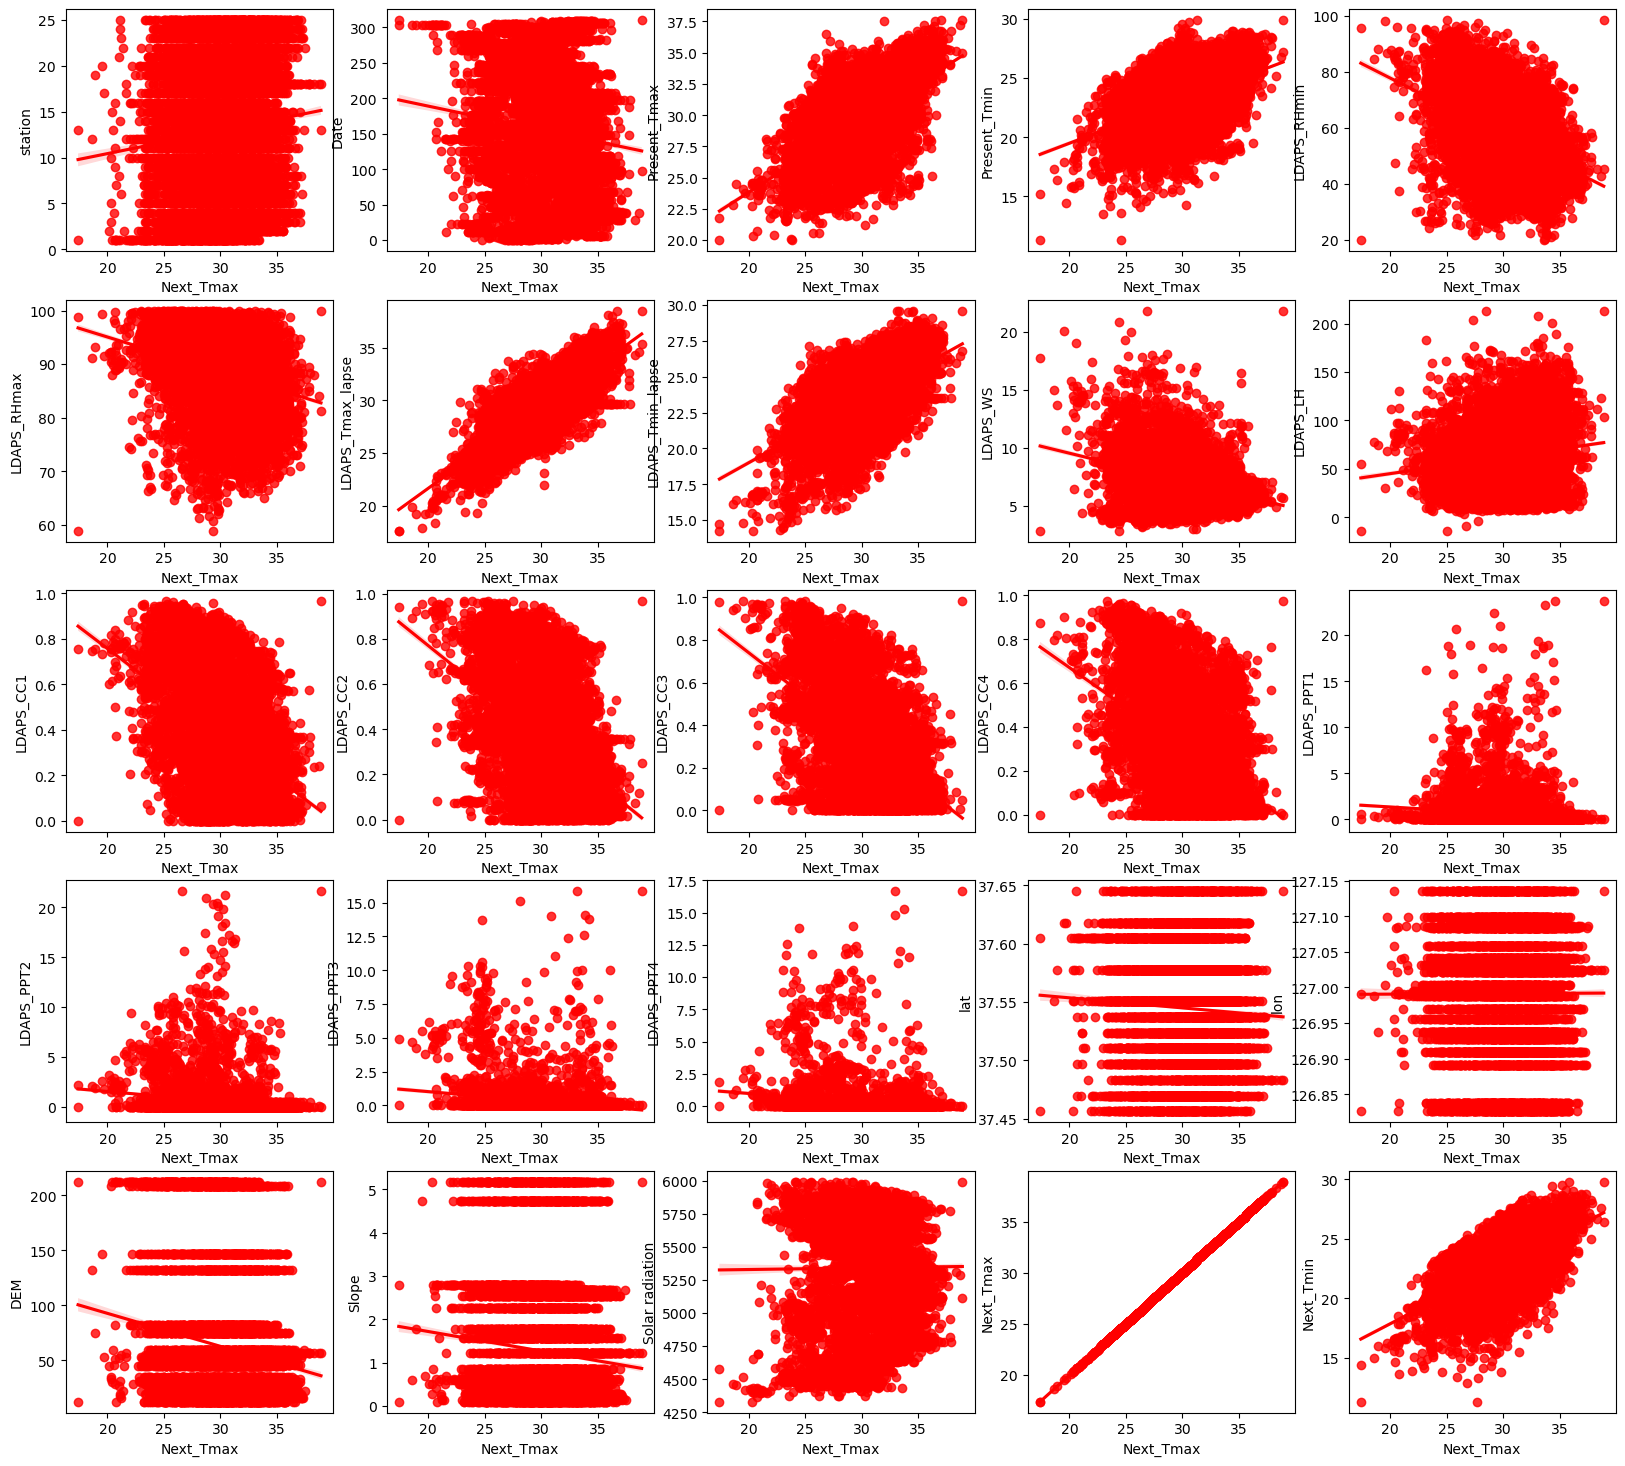

In [80]:
#For Further check and validation lets plot some graphs

# Plot to check correlationship between features and label Region

plt.figure(figsize=(20,22))

p = 1

for i in df2:
    if p <= 30:
        plt.subplot(6,5,p)
        snb.regplot(x='Next_Tmax', y=i, data=df, color='r')
        plt.xlabel='Next_Tmax'
        plt.ylabel=i
        
    p += 1

plt.show()

The graph validate the best features report. 

I will drop columns from LDAPS_PPT3 down, on best features report.

In [81]:

df2.drop(columns=['LDAPS_PPT3','LDAPS_WS','LDAPS_RHmax','LDAPS_PPT4','LDAPS_PPT2','DEM','LDAPS_LH','LDAPS_PPT1','Date','station','Slope','Solar radiation','lat','lon'], inplace=True)

df2

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,28.074101,23.006936,0.233947,0.203896,1.616969e-01,0.130928,29.1,21.2
1,31.9,21.6,52.263397,29.850689,24.035009,0.225508,0.251771,1.594441e-01,0.127727,30.5,22.5
2,31.6,23.3,48.690479,30.091292,24.565633,0.209344,0.257469,2.040915e-01,0.142125,31.1,23.9
3,32.0,23.4,58.239788,29.704629,23.326177,0.216372,0.226002,1.611574e-01,0.134249,31.7,24.3
4,31.4,21.9,56.174095,29.113934,23.486480,0.151407,0.249995,1.788925e-01,0.170021,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,27.812697,18.303014,0.052902,0.030169,0.000000e+00,0.004380,27.6,17.7
7746,22.5,17.4,30.094858,26.704905,17.814038,0.066461,0.024518,5.850000e-07,0.017678,28.0,17.1
7747,23.3,17.1,26.741310,26.352081,18.775678,0.030034,0.081035,0.000000e+00,0.000000,28.3,18.1
7748,23.3,17.7,24.040634,27.010193,18.733519,0.035874,0.074962,0.000000e+00,0.000000,28.6,18.8


In [82]:
df2.shape

(7483, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

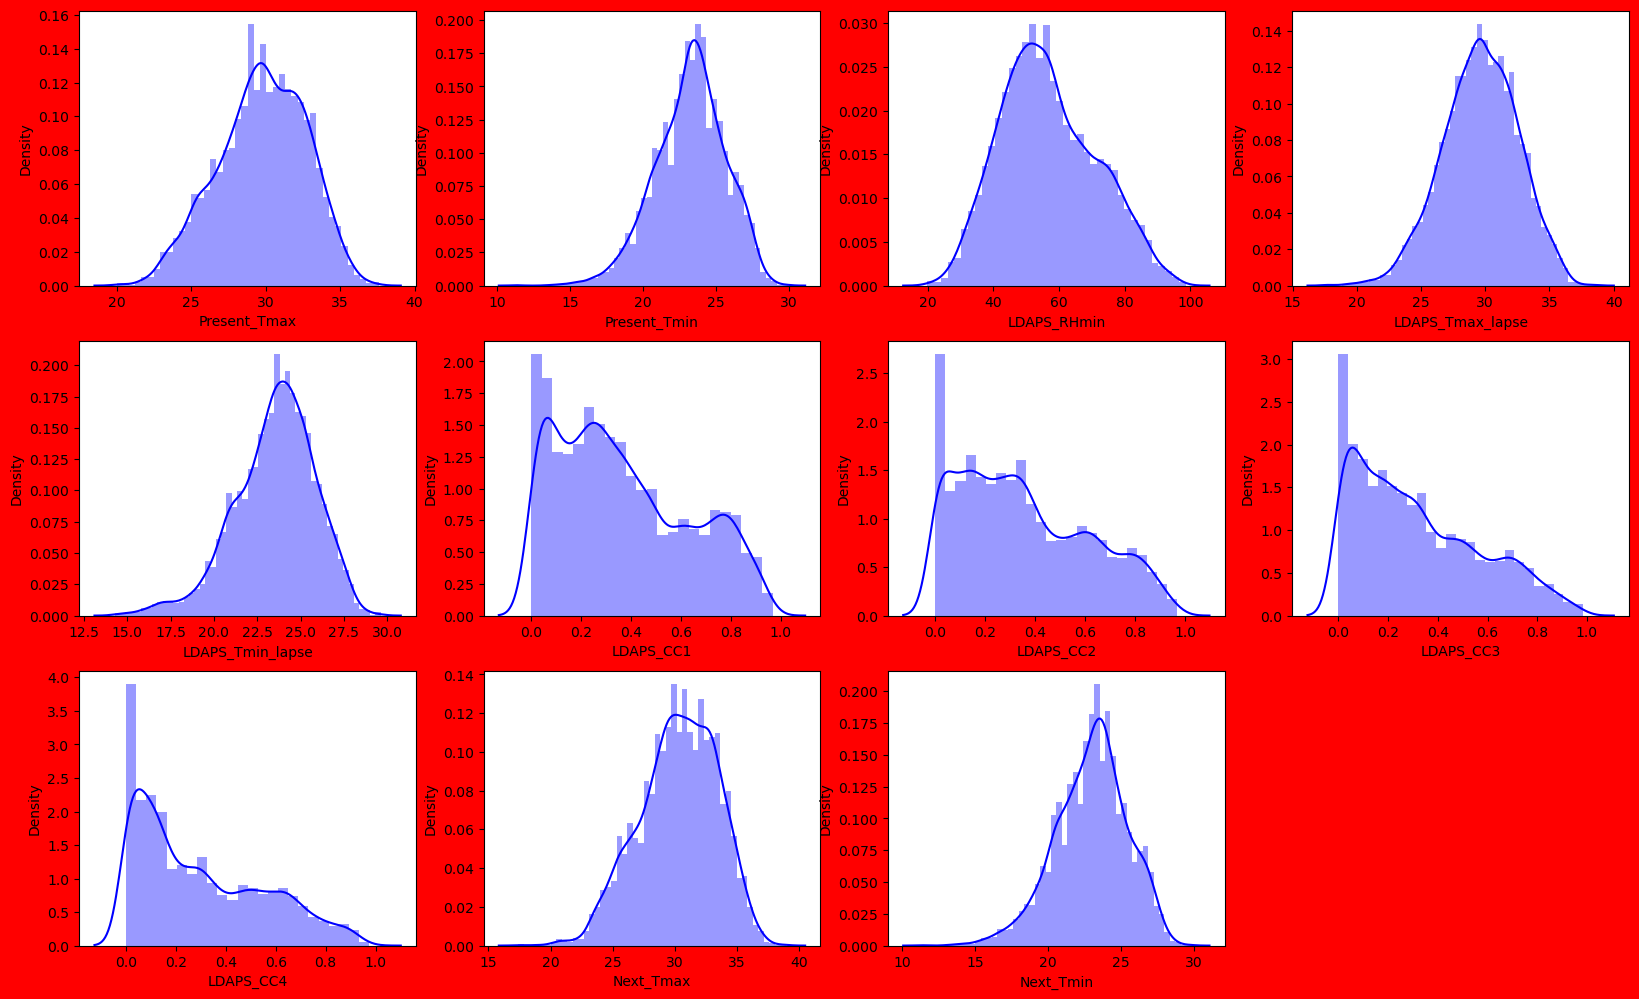

In [83]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df2:
    if p<= 12:
        ax = plt.subplot(6,4,p)
        snb.distplot(df[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

Some features are skewed.

I will check further with skew method for precision.

In [84]:
df2.skew()

Present_Tmax       -0.226229
Present_Tmin       -0.215839
LDAPS_RHmin         0.280822
LDAPS_Tmax_lapse   -0.095681
LDAPS_Tmin_lapse   -0.378561
LDAPS_CC1           0.481478
LDAPS_CC2           0.468849
LDAPS_CC3           0.638209
LDAPS_CC4           0.673042
Next_Tmax          -0.267586
Next_Tmin          -0.270042
dtype: float64

LDAPS_CC3 and LDAPS_CC4 are outside the acceptable range of -0.5 to 0.5 skewness.

I will remove it using yeo johnson method

In [85]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to the skewed column
pt = PowerTransformer(method='yeo-johnson')

df2['LDAPS_CC3'] = pt.fit_transform(df2['LDAPS_CC3'].values.reshape(-1, 1))
df2['LDAPS_CC4'] = pt.fit_transform(df2['LDAPS_CC4'].values.reshape(-1, 1))

df2.skew()

Present_Tmax       -0.226229
Present_Tmin       -0.215839
LDAPS_RHmin         0.280822
LDAPS_Tmax_lapse   -0.095681
LDAPS_Tmin_lapse   -0.378561
LDAPS_CC1           0.481478
LDAPS_CC2           0.468849
LDAPS_CC3           0.085921
LDAPS_CC4           0.125627
Next_Tmax          -0.267586
Next_Tmin          -0.270042
dtype: float64

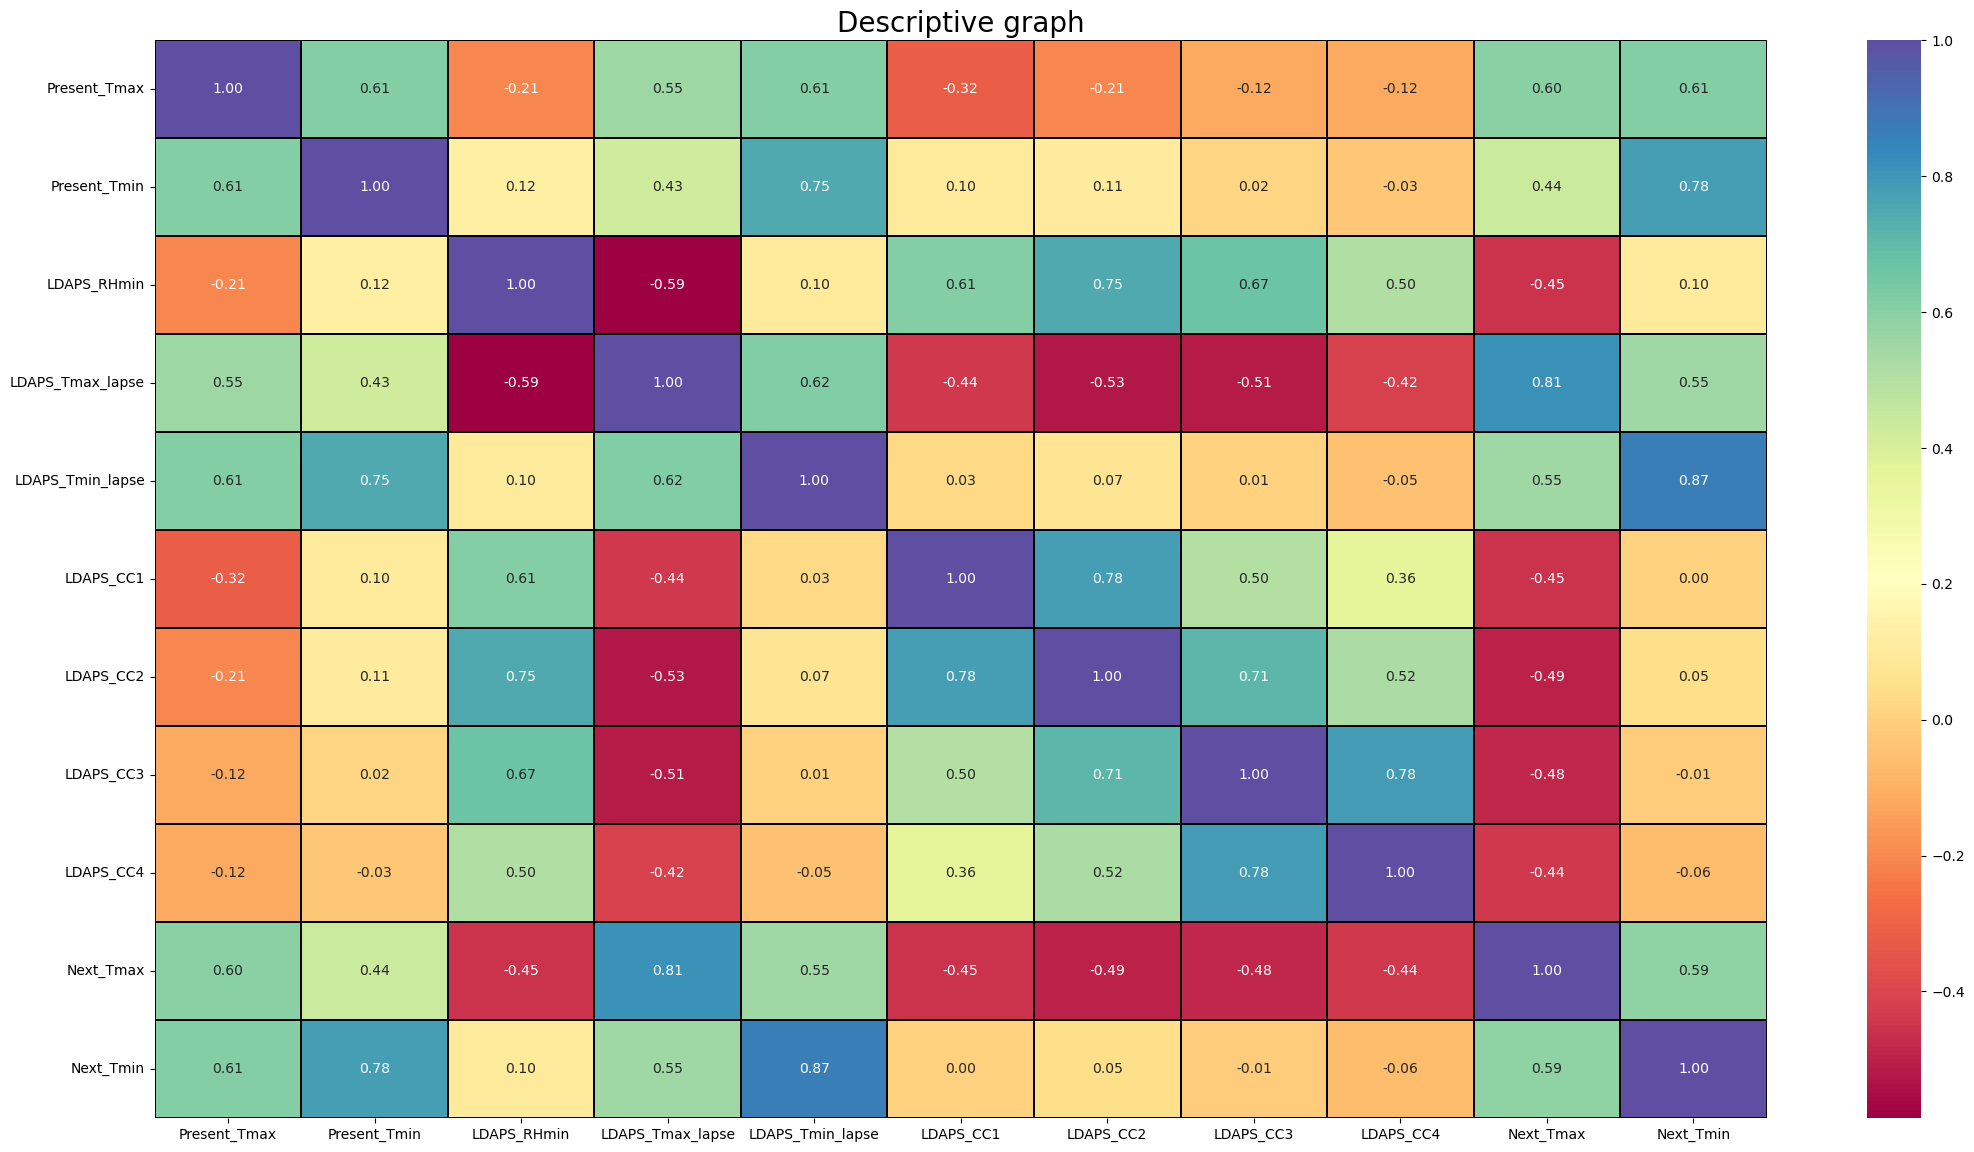

In [86]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

I observe slight multi-colinearity but will treat it by checking for VIF and fix it


In [87]:

from sklearn.feature_selection import SelectKBest, f_classif

# Seperate the label from the features
x = df2.drop('Next_Tmax', axis=1)

y = df2['Next_Tmax']

In [88]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,Next_Tmin
0,-0.386369,-0.830145,0.105443,-0.588927,-0.278966,-0.507951,-0.589822,-0.539553,-0.587445,-0.779297
1,0.721833,-0.743501,-0.311397,0.042318,0.187836,-0.540328,-0.402266,-0.552103,-0.606409,-0.229470
2,0.617939,-0.007024,-0.559939,0.127808,0.428768,-0.602344,-0.379943,-0.313143,-0.522169,0.362651
3,0.756465,0.036298,0.104337,-0.009579,-0.134013,-0.575379,-0.503218,-0.542553,-0.567916,0.531829
4,0.548677,-0.613535,-0.039358,-0.219461,-0.061227,-0.824620,-0.409224,-0.445522,-0.366421,-0.229470
...,...,...,...,...,...,...,...,...,...,...
7478,-2.325723,-2.389743,-2.229549,-0.681808,-2.414808,-1.202536,-1.270408,-1.603049,-1.456934,-2.259600
7479,-2.533511,-2.563032,-1.853502,-1.075421,-2.636830,-1.150517,-1.292544,-1.603045,-1.352525,-2.513366
7480,-2.256460,-2.692998,-2.086784,-1.200784,-2.200192,-1.290270,-1.071137,-1.603049,-1.492098,-2.090423
7481,-2.256460,-2.433065,-2.274651,-0.966948,-2.219335,-1.267866,-1.094927,-1.603049,-1.492098,-1.794362


In [89]:
# Checking Variance Inflation Factor to confirm multiple colinearity and variance value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,2.409488,Present_Tmax
1,3.115680,Present_Tmin
2,4.061559,LDAPS_RHmin
3,5.984167,LDAPS_Tmax_lapse
4,6.944986,LDAPS_Tmin_lapse
5,2.929490,LDAPS_CC1
6,4.586166,LDAPS_CC2
7,4.203414,LDAPS_CC3
8,2.640319,LDAPS_CC4
9,5.050685,Next_Tmin


I will drop LDAPS_Tmin_lapse and recheck

In [90]:
x.drop('LDAPS_Tmin_lapse', axis=1, inplace=True)


In [91]:
# Checking Variance Inflation Factor to confirm multiple colinearity and variance value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,2.358103,Present_Tmax
1,3.054843,Present_Tmin
2,3.548882,LDAPS_RHmin
3,3.849559,LDAPS_Tmax_lapse
4,2.927944,LDAPS_CC1
5,4.488525,LDAPS_CC2
6,4.187494,LDAPS_CC3
7,2.636687,LDAPS_CC4
8,3.915070,Next_Tmin


The remaining features is within aceptable threshold of 5

In [92]:
#For linear regrassion problem, I will be import regression algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.7746999438902378  at random state :  224


In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [94]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_LR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_LR))
print('mean squared error : ',mean_squared_error(y_test, pred_LR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score :  0.7746999438902378
R2 Score on training data :  73.50827812036702
mean absolute error :  1.109620504465231
mean squared error :  2.083704625448352
root mean squared error :  1.4435042866054648


In [95]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_knn))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_knn))
print('mean squared error : ',mean_squared_error(y_test, pred_knn))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 Score :  0.9127740496957188
R2 Score on training data :  94.33247686936664
mean absolute error :  0.6523338940904275
mean squared error :  0.8067158048980326
root mean squared error :  0.898173593966129


In [96]:
GRR = GradientBoostingRegressor()
GRR.fit(x_train, y_train)
pred_GRR = GRR.predict(x_test)
pred_train = GRR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_GRR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_GRR))
print('mean squared error : ',mean_squared_error(y_test, pred_GRR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_GRR)))

R2 Score :  0.8282169833996047
R2 Score on training data :  83.27836153509021
mean absolute error :  0.9803114075064785
mean squared error :  1.5887482339965786
root mean squared error :  1.2604555660540273


In [97]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_lasso))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_lasso))
print('mean squared error : ',mean_squared_error(y_test, pred_lasso))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score :  0.5608709550503488
R2 Score on training data :  53.94886085160908
mean absolute error :  1.6109396814586843
mean squared error :  4.06131821682515
root mean squared error :  2.0152712514262565


In [98]:
ridge =Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_ridge))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_ridge))
print('mean squared error : ',mean_squared_error(y_test, pred_ridge))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score :  0.7746934273723857
R2 Score on training data :  73.50827550220995
mean absolute error :  1.109650868567681
mean squared error :  2.0837648939570457
root mean squared error :  1.443525162218188


In [99]:
dtr =DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_dtr))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_dtr))
print('mean squared error : ',mean_squared_error(y_test, pred_dtr))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_dtr)))  

R2 Score :  0.7473074618692586
R2 Score on training data :  100.0
mean absolute error :  1.0810133125752301
mean squared error :  2.3370460691886854
root mean squared error :  1.5287400266849447


I will cross validate KNN, DecisionTreeRegressor,Ridge, GradientBoostingRegressor to get the best performing model.

In [101]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_knn) - score.mean())

[0.56135112 0.50772195 0.45792935 0.67278238 0.52431448]
0.544819854448287
Difference between R2 score and cross validation score is  0.3679541952474319


In [102]:
score = cross_val_score(GRR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_GRR) - score.mean())

[0.67343336 0.67405313 0.64075203 0.78287395 0.61610811]
0.6774441148813019
Difference between R2 score and cross validation score is  0.15077286851830285


In [103]:
score = cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_ridge) - score.mean())

[0.62618061 0.69305126 0.67235031 0.76777576 0.68375876]
0.6886233407330833
Difference between R2 score and cross validation score is  0.08607008663930238


In [104]:
score = cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_dtr) - score.mean())

[0.29402053 0.39622069 0.33591924 0.52776004 0.35765928]
0.3823159541290738
Difference between R2 score and cross validation score is  0.36499150774018474


Ridge has the lowest difference and better score after cross validation.

In [105]:
# The best choice is ridge

# The model with the least dif the best choice
# Hyper parameter tuning to get best parameter for my model
#Build model for best performing option

from sklearn.model_selection import GridSearchCV

param = {'alpha':[1.0,.05,.4,2],'fit_intercept':[True, False], 'solver' :['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
             'positive' : [False,True],
             'random_state' : [1,4,10,20]}

gscv = GridSearchCV(ridge, param, cv=5)

gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [106]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'sag'}

In [107]:
model= Ridge(alpha=2,fit_intercept=True, positive=False, random_state=1,solver='sag')

In [108]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('R2 Score : ', r2_score(y_test, pred))
print('mean absolute error : ',mean_absolute_error(y_test, pred))
print('mean squared error : ',mean_squared_error(y_test, pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred)))

R2 Score :  0.7746878568308838
mean absolute error :  1.1096929085081018
mean squared error :  2.083816413531848
root mean squared error :  1.4435430071639181


The score has improved

In [195]:
# Save model

import joblib
import pickle

filename = 'Maximum_Temperature.pkl'
pickle.dump(model,open(filename, 'wb'))

In [196]:
loaded_model = pickle.load(open('Maximum_Temperature.pkl','rb'))

result = loaded_model.score(x_test, y_test)
print(result * 100)

82.60356007584342


In [197]:
#checking the value of original and predicted minimum temperature 
con = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])

con

,0,1,2,3,4,5,6,7,8,9,...,2235,2236,2237,2238,2239,2240,2241,2242,2243,2244
Predicted,25.990249,25.136664,24.366843,22.775421,24.641615,26.547377,21.887582,25.633981,25.226813,22.340623,...,23.346621,23.151825,21.652594,24.095261,24.097474,21.752117,22.99474,22.129049,22.285125,26.377444
Original,26.500000,24.500000,25.500000,23.600000,25.100000,25.600000,22.400000,25.000000,26.600000,20.700000,...,23.700000,22.800000,21.600000,24.300000,25.700000,22.400000,24.00000,21.600000,23.700000,26.500000


Solving regression problem for maximum temperature prediction model

The features are much and want to select best performing features to improve the speed of the model.

# Select best performing features for models that can predict the minimum temperature

In [135]:
# Create new dataframe for dataset to create model for maximum temperature prediction

df3 = df[(z<3).all(axis=1)]

df3

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,304,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [138]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seperate the label from the features
xmin = df3.drop('Next_Tmin', axis=1)

ymin = df3['Next_Tmin']

In [139]:
# Checking best performing features
best_features = SelectKBest(score_func=f_classif,k=9)
fit = best_features.fit(xmin,ymin)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(xmin.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(30,'score'))

        feature_name       score
7   LDAPS_Tmin_lapse  164.183818
3       Present_Tmin   82.501398
2       Present_Tmax   33.898354
23         Next_Tmax   29.800229
6   LDAPS_Tmax_lapse   24.074755
22   Solar radiation    4.270738
20               DEM    4.149386
4        LDAPS_RHmin    3.234735
5        LDAPS_RHmax    2.932382
13         LDAPS_CC4    2.611861
12         LDAPS_CC3    2.348991
0            station    2.213038
17        LDAPS_PPT4    2.123468
1               Date    2.039990
11         LDAPS_CC2    2.017634
21             Slope    1.880153
10         LDAPS_CC1    1.808294
14        LDAPS_PPT1    1.526264
18               lat    1.459961
9           LDAPS_LH    1.362006
8           LDAPS_WS    1.340698
16        LDAPS_PPT3    1.230174
19               lon    0.924116
15        LDAPS_PPT2    0.912287


I will drop columns, starting from solar radiation due to very low perfomance on minimum temperature prediction

In [140]:

df3.drop(columns=['LDAPS_RHmin','LDAPS_CC4','LDAPS_CC1','LDAPS_CC3','LDAPS_CC2','LDAPS_PPT3','LDAPS_WS','LDAPS_RHmax','LDAPS_PPT4','LDAPS_PPT2','DEM','LDAPS_LH','LDAPS_PPT1','Date','station','Slope','Solar radiation','lat','lon'], inplace=True)

df3

,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Next_Tmax,Next_Tmin
0,28.7,21.4,28.074101,23.006936,29.1,21.2
1,31.9,21.6,29.850689,24.035009,30.5,22.5
2,31.6,23.3,30.091292,24.565633,31.1,23.9
3,32.0,23.4,29.704629,23.326177,31.7,24.3
4,31.4,21.9,29.113934,23.486480,31.2,22.5
...,...,...,...,...,...,...
7745,23.1,17.8,27.812697,18.303014,27.6,17.7
7746,22.5,17.4,26.704905,17.814038,28.0,17.1
7747,23.3,17.1,26.352081,18.775678,28.3,18.1
7748,23.3,17.7,27.010193,18.733519,28.6,18.8


<function matplotlib.pyplot.show(close=None, block=None)>

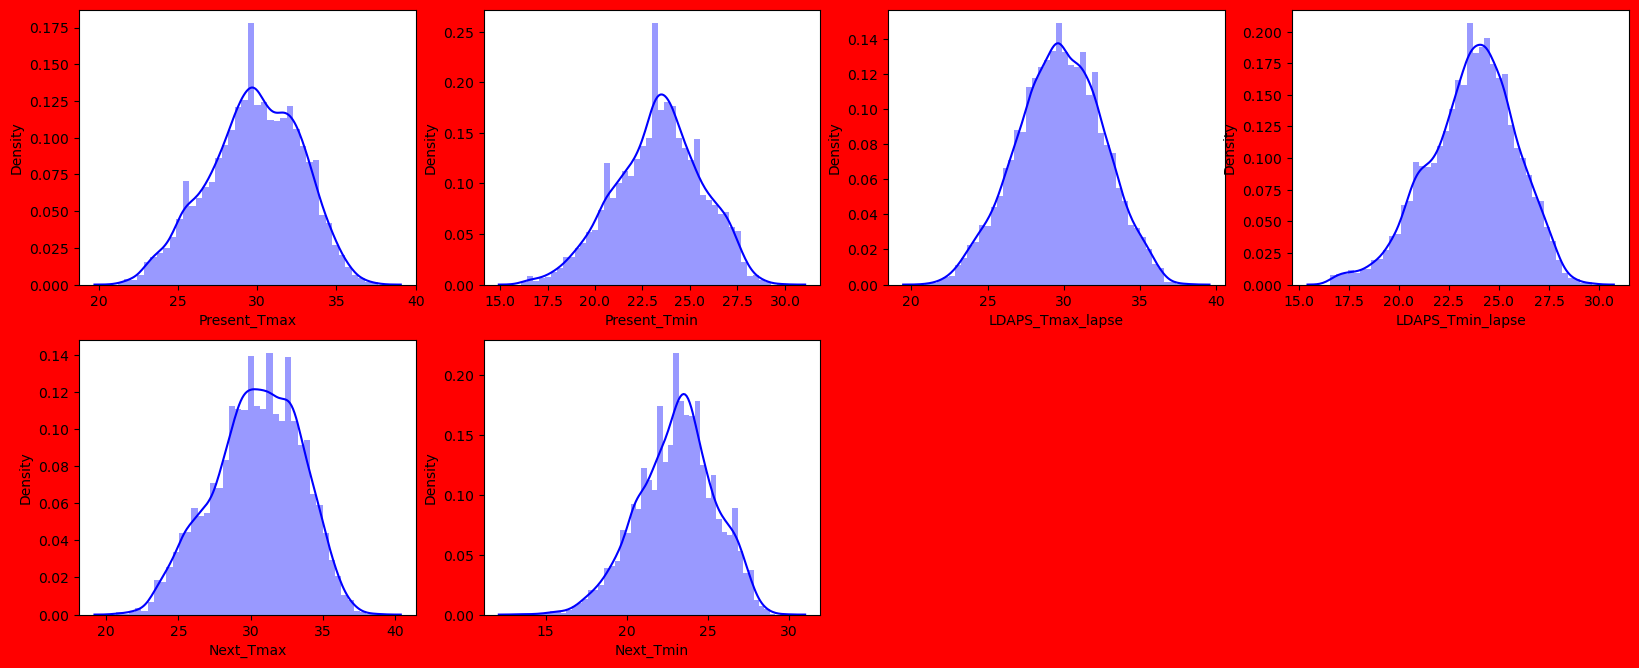

In [141]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df3:
    if p<= 12:
        ax = plt.subplot(6,4,p)
        snb.distplot(df3[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

I observe some plot showing skewness. Let me further check and validsate for skewness

In [142]:
df3.skew()

Present_Tmax       -0.226229
Present_Tmin       -0.215839
LDAPS_Tmax_lapse   -0.095681
LDAPS_Tmin_lapse   -0.378561
Next_Tmax          -0.267586
Next_Tmin          -0.270042
dtype: float64

They are all withing acceptable range of -0.5 to 0.5

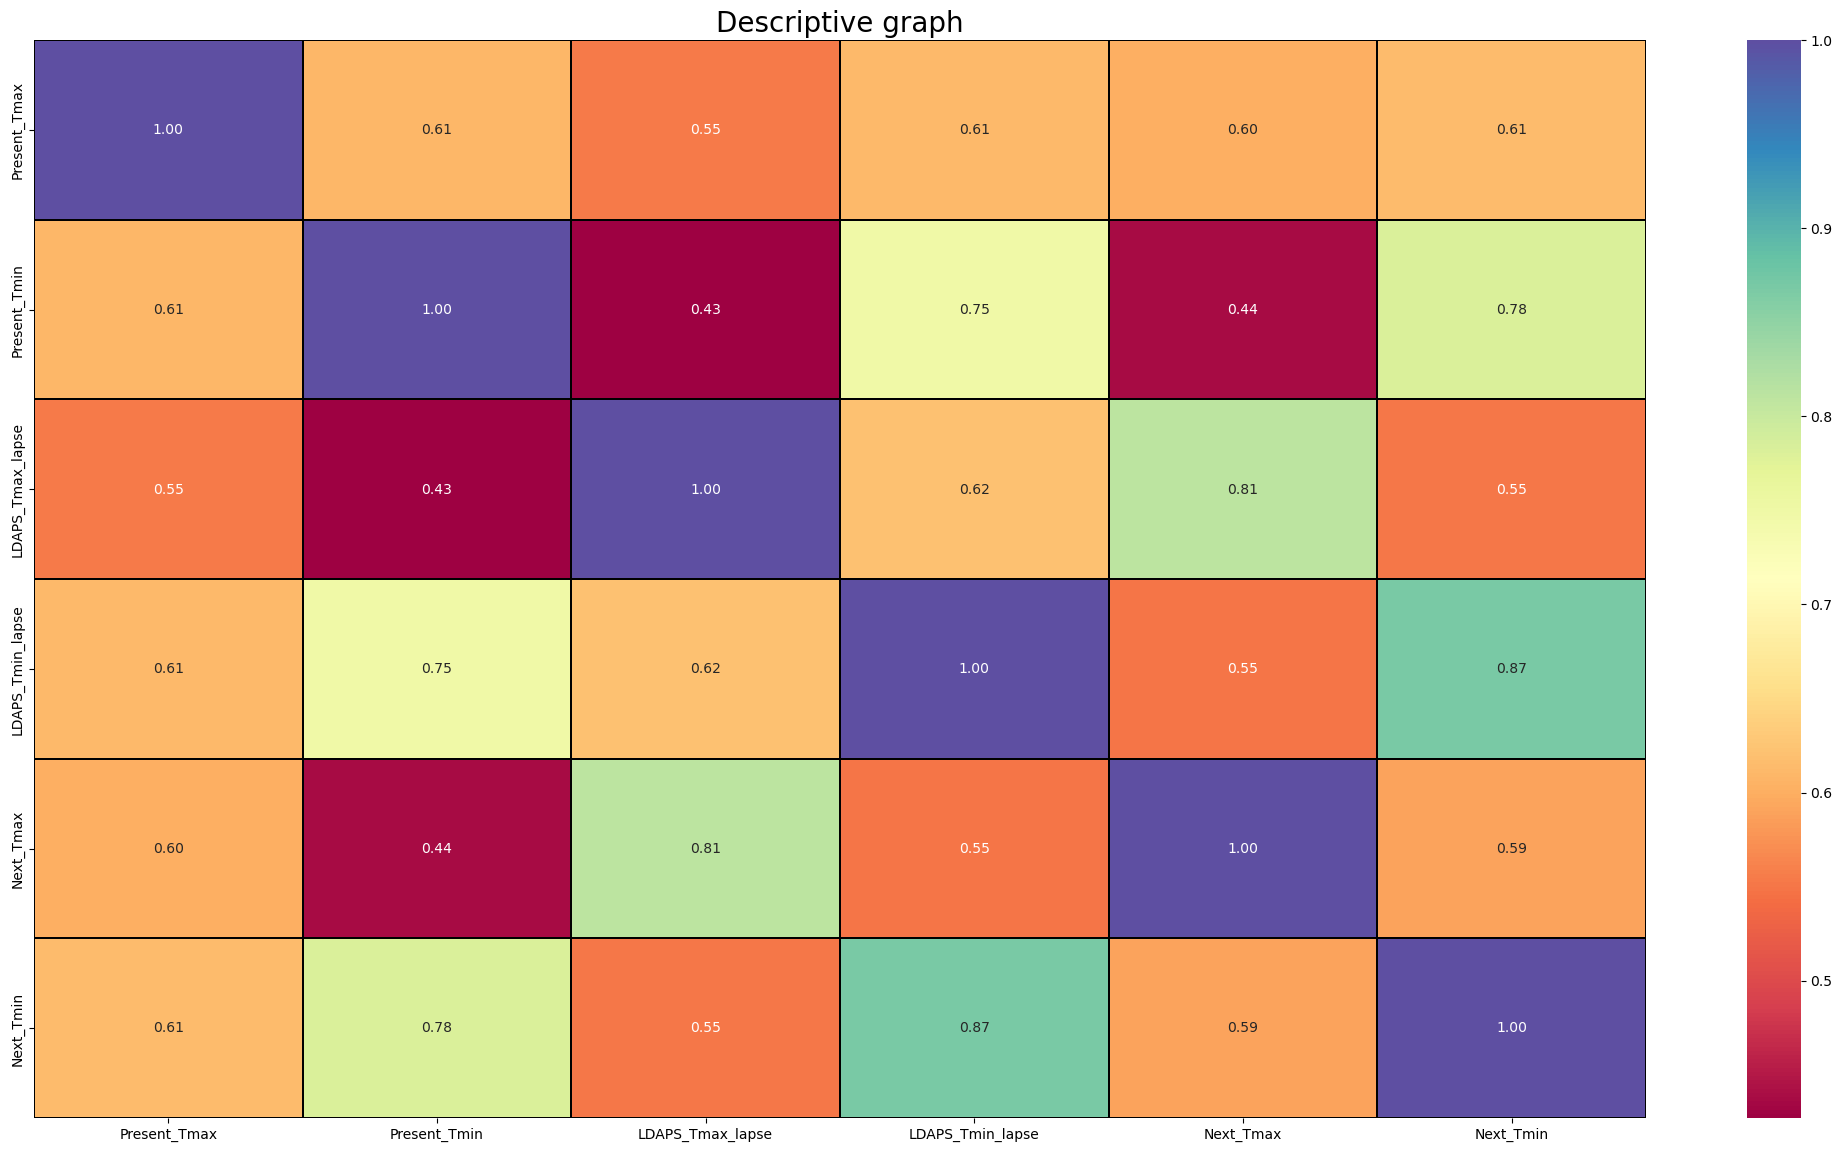

In [143]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df3.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

I observer multiple colinearity but will further check with VIF

In [144]:

from sklearn.feature_selection import SelectKBest, f_classif

# Seperate the label from the features
x = df3.drop('Next_Tmin', axis=1)

y = df3['Next_Tmin']

In [145]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Next_Tmax
0,-0.386369,-0.830145,-0.588927,-0.278966,-0.432807
1,0.721833,-0.743501,0.042318,0.187836,0.031777
2,0.617939,-0.007024,0.127808,0.428768,0.230884
3,0.756465,0.036298,-0.009579,-0.134013,0.429992
4,0.548677,-0.613535,-0.219461,-0.061227,0.264069
...,...,...,...,...,...
7478,-2.325723,-2.389743,-0.681808,-2.414808,-0.930576
7479,-2.533511,-2.563032,-1.075421,-2.636830,-0.797838
7480,-2.256460,-2.692998,-1.200784,-2.200192,-0.698284
7481,-2.256460,-2.433065,-0.966948,-2.219335,-0.598730


In [146]:
# Checking Variance Inflation Factor to confirm multiple colinearity and variance value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,2.090237,Present_Tmax
1,2.553420,Present_Tmin
2,3.444663,LDAPS_Tmax_lapse
3,3.081548,LDAPS_Tmin_lapse
4,3.257725,Next_Tmax


They are all below the threshold of 5. They are good for modeling

In [147]:
#For linear regrassion problem, I will be import regression algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.8347147271451544  at random state :  149


In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [149]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_LR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_LR))
print('mean squared error : ',mean_squared_error(y_test, pred_LR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score :  0.8347147271451544
R2 Score on training data :  81.17456344613674
mean absolute error :  0.7604311412289289
mean squared error :  0.9329562841092589
root mean squared error :  0.96589662185415


In [150]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_RFR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_RFR))
print('mean squared error : ',mean_squared_error(y_test, pred_RFR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score :  0.8543238294765789
R2 Score on training data :  97.69863125528143
mean absolute error :  0.6985619577774418
mean squared error :  0.8222722834729146
root mean squared error :  0.9067923044848333


In [151]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_knn))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_knn))
print('mean squared error : ',mean_squared_error(y_test, pred_knn))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 Score :  0.8582116867140037
R2 Score on training data :  89.28777874959951
mean absolute error :  0.6709899579792564
mean squared error :  0.8003271895227687
root mean squared error :  0.8946100768059617


In [152]:
GRR = GradientBoostingRegressor()
GRR.fit(x_train, y_train)
pred_GRR = GRR.predict(x_test)
pred_train = GRR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_GRR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_GRR))
print('mean squared error : ',mean_squared_error(y_test, pred_GRR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_GRR)))

R2 Score :  0.8417618184331981
R2 Score on training data :  85.07853494382397
mean absolute error :  0.7445238505826166
mean squared error :  0.8931788254868814
root mean squared error :  0.9450813856419358


In [153]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_lasso))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_lasso))
print('mean squared error : ',mean_squared_error(y_test, pred_lasso))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score :  0.5999917961870361
R2 Score on training data :  57.980441044366835
mean absolute error :  1.1911266279636097
mean squared error :  2.257854925588558
root mean squared error :  1.5026160273298557


In [154]:
ridge =Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_ridge))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_ridge))
print('mean squared error : ',mean_squared_error(y_test, pred_ridge))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score :  0.8347114060465763
R2 Score on training data :  81.17455769537789
mean absolute error :  0.7604425601861755
mean squared error :  0.9329750301217442
root mean squared error :  0.9659063257489021


Let me do cross validation for high performing models



In [155]:
# Do cross validation for the models to validate model performance

from sklearn.model_selection import cross_val_score

#cross_val_score(model/estimate, features, target, CV=5, scoring='r2')
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_LR) - score.mean())

[0.69243893 0.66222202 0.80498486 0.8667525  0.83985184]
0.7732500295315734
Difference between R2 score and cross validation score is  0.061464697613580976


In [156]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_RFR) - score.mean())

[0.63706365 0.62216438 0.77282987 0.82694637 0.79176379]
0.7301536129212751
Difference between R2 score and cross validation score is  0.1241702165553038


In [157]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_knn) - score.mean())

[0.54324767 0.53018261 0.74211053 0.80603786 0.74026026]
0.6723677873854861
Difference between R2 score and cross validation score is  0.18584389932851764


In [158]:
score = cross_val_score(GRR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_GRR) - score.mean())

[0.64845889 0.63954019 0.80334371 0.84423409 0.8187797 ]
0.7508713158548991
Difference between R2 score and cross validation score is  0.090890502578299


In [160]:
score = cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_lasso) - score.mean())

[0.69242516 0.66222457 0.80498598 0.86675083 0.83986205]
0.7732497178097409
Difference between R2 score and cross validation score is  -0.1732579216227048


LinearRegression and Ridge has very close result but I will go for LinearRegression

In [181]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [183]:
# My choice is LinearRegression
# The model with the least dif the best choice
# Hyper parameter tuning to get best parameter for my model
#Build model for best performing option

param = { 'copy_X' :['True','False'],
             'fit_intercept' : ['True','False'],
             'n_jobs' : [-2,-1,1],
             'positive': ['True','False']}

gscv = GridSearchCV(LinearRegression(), param, cv=5)

gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [-2, -1, 1], 'positive': ['True', 'False']})

In [184]:
gscv.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': -2, 'positive': 'True'}

In [193]:
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-2, normalize=False, positive=True)

In [194]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('R2 Score : ', r2_score(y_test, pred))
print('mean absolute error : ',mean_absolute_error(y_test, pred))
print('mean squared error : ',mean_squared_error(y_test, pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred)))

R2 Score :  0.8260356007584342
mean absolute error :  0.7809378093576568
mean squared error :  0.9819458000123494
root mean squared error :  0.9909317837330426


The default parameter values is delivering better, so I will go for it

In [198]:
# Save model

import joblib
import pickle

filename = 'Minimum_Temperature.pkl'
pickle.dump(LR,open(filename, 'wb'))

In [199]:
loaded_model = pickle.load(open('Minimum_Temperature.pkl','rb'))

result = loaded_model.score(x_test, y_test)
print(result * 100)

83.47147271451544
